Index(['State', 'RecidivismRate', 'PrisonPopulation', 'ImprisonmentRate',
       'Population', 'QualityOfLifeTotalScore', 'QualityOfLifeQualityOfLife',
       'QualityOfLifeAffordability', 'QualityOfLifeEconomy',
       'QualityOfLifeEducationAndHealth', 'QualityOfLifeSafety', 'Male',
       'Female', 'Rape', 'Arson', 'Fraud', 'Larceny', 'Robbery', 'Runaway',
       'Weapons', 'Burglary', 'Gambling', 'Vagrancy', 'Suspicion', 'Vandalism',
       'Drunkenness', 'Embezzlement', 'Sex_Offenses', 'Rape_Legacy',
       'Simple_Assault', 'Drug_Possession', 'Stolen_Property',
       'Human_Trafficking', 'Aggravated_Assault', 'All_Other_Offenses',
       'Disorderly_Conduct', 'Motor_Vehicle_Theft', 'Drug_Abuse_Violations',
       'Liquor_Law_Violations', 'Counterfeiting_or_Forgery',
       'Drug_Sale_or_Manufacturing', 'Drive_Under_the_Influence',
       'Manslaughter_by_Negligence', 'Murder_and_Nonnegligent_Homicide',
       'Curfew_and_Loitering_Law_Violations',
       'Prostitution_and_Commer

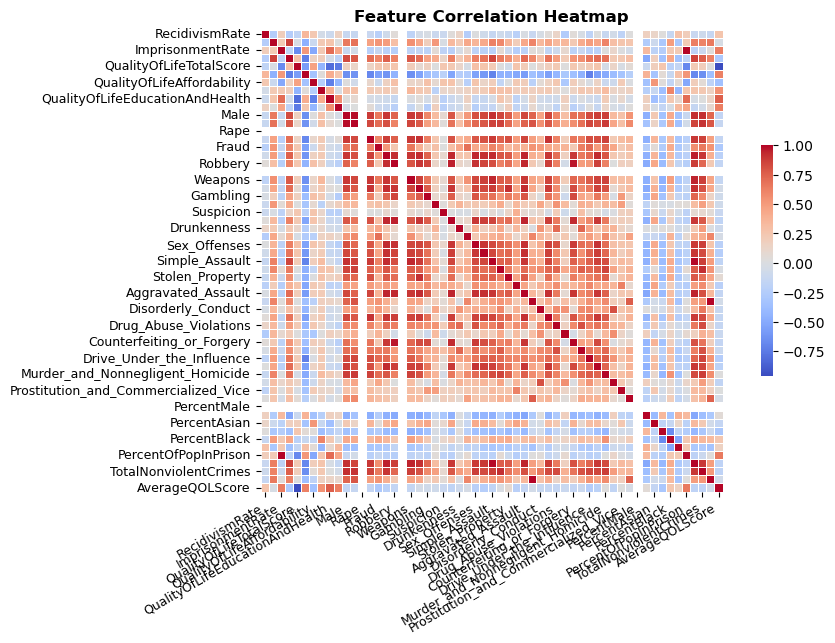

Linear Regression: MSE=169.65, R²=0.98
Ridge Regression: MSE=598.94, R²=0.94
Lasso Regression: MSE=79.70, R²=0.99
Random Forest: MSE=985.20, R²=0.91
                          MSE  R² Score
Linear Regression  169.646179  0.983683
Ridge Regression   598.942122  0.942391
Lasso Regression    79.700588  0.992334
Random Forest      985.204819  0.905238


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from os import path, curdir

ROOT = path.abspath(curdir)

datapath = path.join(ROOT, 'data', 'data.csv')
datapath2 = path.join(ROOT, 'data', 'calculations.csv')

df = pd.read_csv(datapath)
df2 = pd.read_csv(datapath2)
df = pd.merge(df, df2, how= 'left', on='State')
df = df.iloc[:,1:]
df = df.rename(columns={'RecidivismRate_x':'RecidivismRate'})
df=df.drop(columns=['Unnamed: 0_y','RecidivismRate_y'])
print(df.columns)
df 


# Ensure only numeric columns are used for missing value imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Fill missing values

# Select relevant features
target = 'ImprisonmentRate'  # Define target variable
features = [col for col in df.columns if col != target and col != 'State']  # Drop 'State' if categorical

X = df[features]
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Set up the figure with a better aspect ratio
plt.figure(figsize=(10, 6))

# Create the heatmap with improved settings
sns.heatmap(df_numeric.corr(), 
            annot=False,  # Remove annotations to reduce clutter
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=0.5, 
            square=True,  # Keep squares uniform
            cbar_kws={'shrink': 0.5})  # Shrink color bar for better fit

# Improve label appearance
plt.xticks(rotation=30, ha='right', fontsize=9)  # Reduce overlap of labels
plt.yticks(fontsize=9)
plt.title("Feature Correlation Heatmap", fontsize=12, fontweight='bold')
plt.show()


# Step 3: Model Selection
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R² Score': r2}
    print(f"{name}: MSE={mse:.2f}, R²={r2:.2f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)





Correlation between Recidivism Rate and Imprisonment Rate: 0.1908


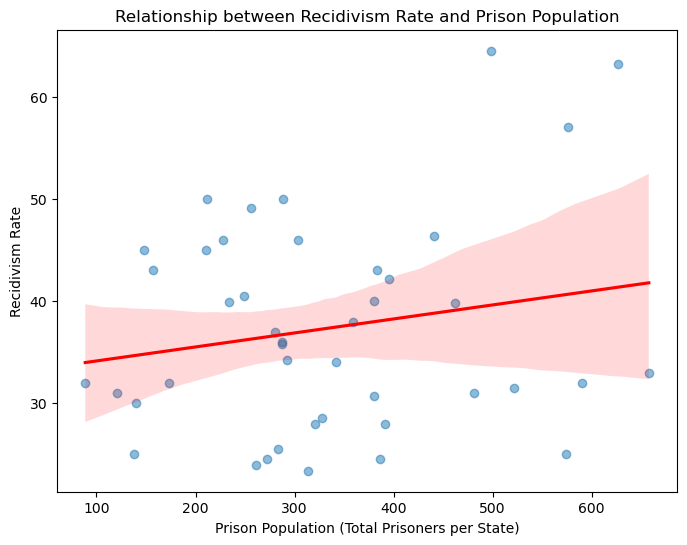

                            OLS Regression Results                            
Dep. Variable:         RecidivismRate   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     2.589
Date:                Fri, 14 Mar 2025   Prob (F-statistic):              0.115
Time:                        10:36:22   Log-Likelihood:                -159.49
No. Observations:                  43   AIC:                             323.0
Df Residuals:                      41   BIC:                             326.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.0717      2.297  

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load your dataset (if needed)
# df = pd.read_csv("your_data.csv")

# Compute correlation
correlation = df["RecidivismRate"].corr(df["ImprisonmentRate"])
print(f"Correlation between Recidivism Rate and Imprisonment Rate: {correlation:.4f}")

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df["ImprisonmentRate"], y=df["RecidivismRate"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Prison Population (Total Prisoners per State)")
plt.ylabel("Recidivism Rate")
plt.title("Relationship between Recidivism Rate and Prison Population")
plt.show()

# Linear regression model
X = df["PrisonPopulation"]
y = df["RecidivismRate"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Display summary of regression
print(model.summary())


Correlation between Imprisonment Rate and Recidivism Rate: 0.1908


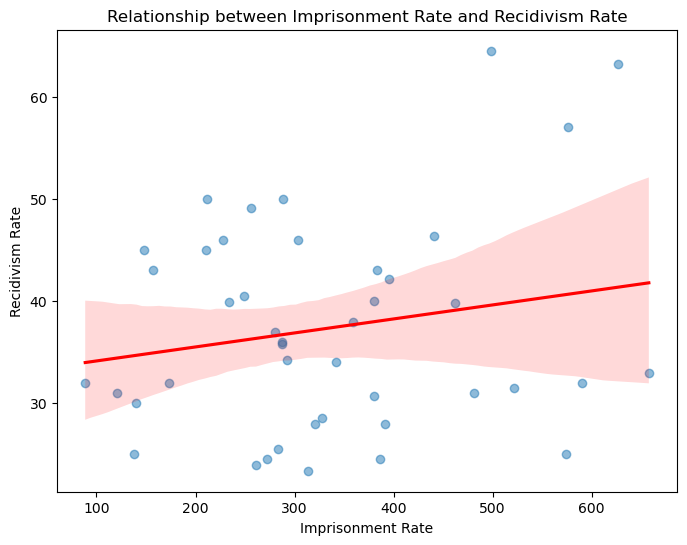

                            OLS Regression Results                            
Dep. Variable:         RecidivismRate   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.549
Date:                Fri, 14 Mar 2025   Prob (F-statistic):              0.220
Time:                        10:36:22   Log-Likelihood:                -160.01
No. Observations:                  43   AIC:                             324.0
Df Residuals:                      41   BIC:                             327.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               32.7710      3.984  

In [87]:

# Compute correlation
correlation = df["ImprisonmentRate"].corr(df["RecidivismRate"])
print(f"Correlation between Imprisonment Rate and Recidivism Rate: {correlation:.4f}")

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df["ImprisonmentRate"], y=df["RecidivismRate"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Imprisonment Rate")
plt.ylabel("Recidivism Rate")
plt.title("Relationship between Imprisonment Rate and Recidivism Rate")
plt.show()

# Linear regression model
X = df["ImprisonmentRate"]
y = df["RecidivismRate"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Display summary of regression
print(model.summary())


In [88]:
df

,State,RecidivismRate,PrisonPopulation,ImprisonmentRate,Population,QualityOfLifeTotalScore,QualityOfLifeQualityOfLife,QualityOfLifeAffordability,QualityOfLifeEconomy,QualityOfLifeEducationAndHealth,...,PercentFemale,PercentAsian,PercentWhite,PercentBlack,PercentNativeAmerican,PercentOfPopInPrison,TotalViolentCrimes,TotalNonviolentCrimes,OtherCrimes,AverageQOLScore
0,Florida,24.5,84121,386.21,23372215,58.07,5,33,6,25,...,0.170266,0.004700,0.405726,0.253963,0.001478,0.003599,52122,70098,94025,16.8
1,New York,43.0,31099,156.78,19867248,60.64,1,46,37,16,...,0.149423,0.022223,0.246700,0.253016,0.003083,0.001565,137983,203102,52177,20.4
2,Pennsylvania,46.0,39286,303.04,13078751,56.42,3,30,38,21,...,0.201241,0.007993,0.474567,0.214395,0.000760,0.003004,62782,189069,38306,21.6
3,Illinois,39.9,29577,233.41,12710158,55.47,4,36,50,23,...,0.184148,0.007941,0.392653,0.270112,0.000815,0.002327,47871,67703,52658,24.0
4,Ohio,30.7,44732,379.73,11883304,49.32,15,22,48,38,...,0.243778,0.003779,0.443962,0.266777,0.000661,0.003764,51037,86474,47979,28.4
5,North Carolina,35.8,30264,286.83,11046024,51.51,16,18,17,31,...,0.198401,0.004894,0.360753,0.312785,0.012796,0.002740,43261,85385,104222,23.6
6,Michigan,28.0,32227,320.64,10140459,50.87,14,15,47,33,...,0.198327,0.003378,0.404692,0.261645,0.005994,0.003178,53316,66987,59472,26.4
7,New Jersey,30.0,12932,139.55,9500851,62.01,7,48,39,5,...,0.159945,0.011515,0.372691,0.267146,0.001384,0.001361,36047,68751,45096,20.0
8,Virginia,23.4,27052,313.02,8811195,58.73,20,16,23,15,...,0.199817,0.008144,0.401199,0.281045,0.000562,0.003070,48025,81263,85196,17.0
9,Washington,32.0,13373,172.81,7958180,52.11,9,37,4,14,...,0.176162,0.024107,0.497503,0.093044,0.025350,0.001680,40376,60495,41253,22.4
